# Fitting Kurva dengan least-squares
Pekanbaru, 2021-09-16

1. Diberikan $n$ data $d_i=d(x_i),i=1,2,\ldots,n$
2. Dipilih fungsi hampiran $y_i=y(x_i)=f(x_i),i=1,2,\ldots,n$. 
3. Antara data dan fungsi terdapat eror
$$e=\dfrac{1}{2}\sum_{i=0}^{n}{\left(d_i-y_i\right)^2}$$
4. Misalkan polinomial orde $m$
$y(x)=\sum_{i=0}^{m}{a_ix^i}$. Eror selanjutnya menjadi
$$e=\dfrac{1}{2}\sum_{i=0}^{n}{\left(d_i-\sum_{i=0}^{m}{a_ix^i}\right)^2}$$
5. Tujuan adalah menentukan nilai $a_i,i=0,1,2,\ldots,m$ yang meminimumkan nilai $e$, yang memenuhi
$$\dfrac{\partial e}{\partial a_i}=0$$
untuk setiap $i=0,1,2,\ldots,m$

<b>Situasi</b>
1. Data tersedia, misalkan dalam excel
2. Fungsi pilihan tersedia, lihat pola datanya
3. Nilai konstanta fungsi pilihan dicari dengan least-square python

<b>prosedur</b>
1. Load data excel ke dalam python, gunakan numpy
2. Hitung selisih data dan fungsi
3. tentukan parameter dengan modul leastsq

## Meng-import data
1. Data disimpan dalam excel
2. Import data dengan pandas
3. Data simpan ke tabel numpy

In [1]:
# import modul yang dipakai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import leastsq

In [2]:
# import data dari excel
# nama excel >> data-least-square
# nama sheet >> linier
# kolom dipakai A:B
df=pd.read_excel('data_least_square.xlsx',sheet_name="linier",usecols="A:B")
data=df.to_numpy(dtype=np.float64)
x=data[:,0]
y=data[:,1]

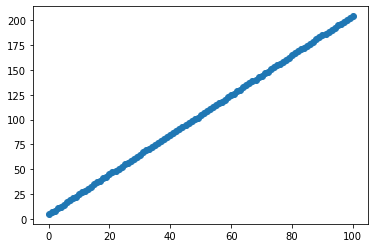

In [3]:
# menggambar pola data untuk menentukan fungsi tebakan
plt.plot(x,y,'o')

In [4]:
# Fungsi tebakan yang dipilih adalah linier

## Menghitung fungsi pada domain data
1. Proses dengan procedure
2. Input >> domain, parameter
3. Output >> nilai fungsi di tiap domain

In [5]:
# input x dari data
# par adalah (a1,a0) dalam tuple
def fungsi_linier(x,par):
    a,b=par
    y=a*x+b
    return y

In [6]:
x.shape

(101,)

In [7]:
nilai=fungsi_linier(x,(1,2))
np.shape(nilai)

(101,)

## Menghitung eror data dan fungsi
1. Proses dengan prosedur
2. Data sudah diberikan
3. Fungsi dievaluasi dari domain diberikan dan parameter tebakan

In [8]:
# input adalah parameter
def selisih(p):
    eror=y-fungsi_linier(x,p)
    return eror.flatten()

In [9]:
coba=selisih((1,2))
np.shape(coba)

(101,)

## Prosedure untuk menghitung parameter
1. Modul menggunakan least-square
2. Membutuhkan tebakan awal
3. Membutuhkan procedure eror

In [10]:
tebakan_awal=(10,5)
hasil=leastsq(selisih,tebakan_awal)

In [11]:
hasil

(array([1.99987895, 4.51718301]), 3)

In [12]:
# ambil nilai parameter dari hasil
param=hasil[0]

## Membuat kurva 
1. Kurva data
2. Kurva estimasi
3. Kurva eror

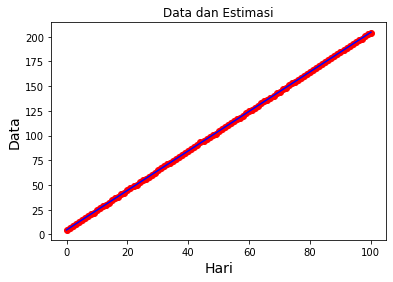

In [13]:
plt.figure(1)
plt.plot(x,y,'or',label='data')
plt.plot(x,fungsi_linier(x,param),'-b',label='estimasi')
plt.xlabel('Hari',fontsize=14)
plt.ylabel('Data',fontsize=14)
plt.title('Data dan Estimasi')
plt.show()

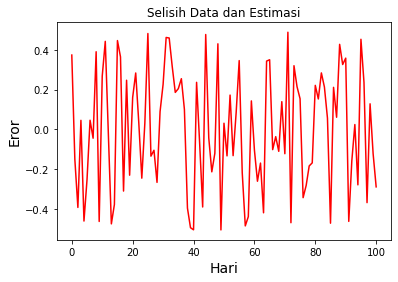

In [14]:
plt.figure(2)
plt.plot(x,y-fungsi_linier(x,param),'-r',label='selisih')
plt.xlabel('Hari',fontsize=14)
plt.ylabel('Eror',fontsize=14)
plt.title('Selisih Data dan Estimasi')
plt.show()